In [74]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../..")

import numpy as np
import matplotlib.pyplot as plt

from src.backprojection import apply_filter, cosine_weighting
from src.filters import RamLak, SheppLogan, Cosine, Gaussian
from src.phantoms import helsinki_challenge
from src.utils import best_crop

from challenge.utils import segment, calculate_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
arcs = [360, 90, 60, 30]

# Baseline FBP

In [76]:
filters = [RamLak(), SheppLogan(), Cosine(), Gaussian(0.5), Gaussian(1), Gaussian(2)]

In [83]:
best_fbp = [[],[],[],[]]

for i, arc in enumerate(arcs):
    sinogram, xray_operator, ground_truth = helsinki_challenge(arc=arc)
    seg_ground_truth = segment(ground_truth)
    best_score = 0
    for f in filters:
        fbp = xray_operator.applyAdjoint(apply_filter(sinogram, f))
        score = calculate_score(segment(fbp), seg_ground_truth)
        print(f"Score for {f.__class__.__name__} with {arc} degrees: {score}")
        if score > best_score:
            best_score = score
            best_fbp[i] = fbp

[2023-07-09 10:16:29.815] [CircleTrajectoryGenerator] [info] creating 2D trajectory with 720 poses in an 359.5 degree arc
Score for RamLak with 360 degrees: 0.99224730195749
Score for SheppLogan with 360 degrees: 0.9916625355022718
Score for Cosine with 360 degrees: 0.9907477477632075
Score for Gaussian with 360 degrees: 0.9877134810380789
Score for Gaussian with 360 degrees: 0.9907185794237093
Score for Gaussian with 360 degrees: 0.9916722761161303
[2023-07-09 10:16:30.032] [CircleTrajectoryGenerator] [info] creating 2D trajectory with 180 poses in an 89.5 degree arc
Score for RamLak with 90 degrees: 0.6484106326743935
Score for SheppLogan with 90 degrees: 0.6506854861494396
Score for Cosine with 90 degrees: 0.6531704977487035
Score for Gaussian with 90 degrees: 0.65172321987391
Score for Gaussian with 90 degrees: 0.6516108916953216
Score for Gaussian with 90 degrees: 0.6508003974545311
[2023-07-09 10:16:30.134] [CircleTrajectoryGenerator] [info] creating 2D trajectory with 120 poses 

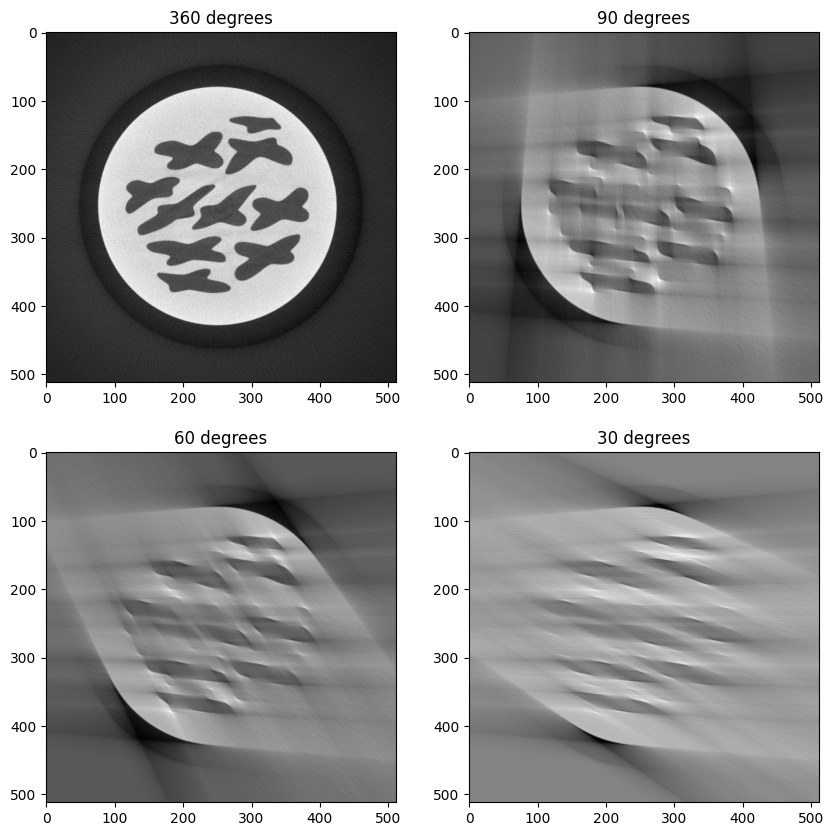

In [78]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i, fbp in enumerate(best_fbp):
    axs[i // 2, i % 2].imshow(fbp, cmap="gray")
    axs[i // 2, i % 2].set_title(f"{arcs[i]} degrees")

In [80]:
for fbp in best_fbp:
    best_crop(fbp)
    print(calculate_score(segment(fbp), seg_ground_truth))

0.9840067591007955
0.8439049964657354
0.8151740931616004
0.7433402607769203


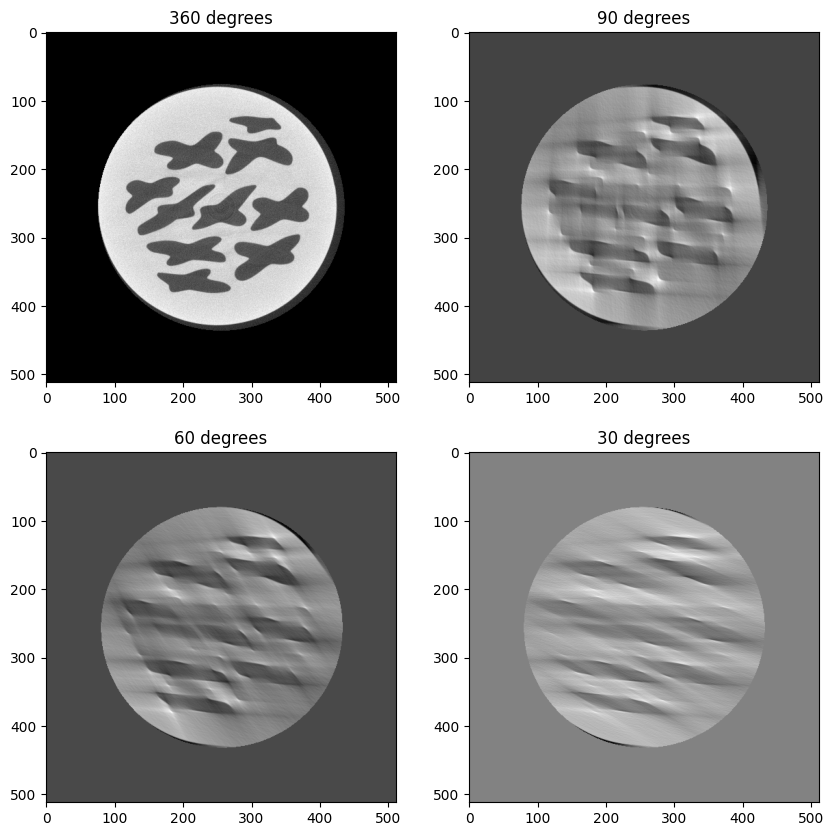

In [81]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i, fbp in enumerate(best_fbp):
    axs[i // 2, i % 2].imshow(fbp, cmap="gray")
    axs[i // 2, i % 2].set_title(f"{arcs[i]} degrees")